Ans: 
#Business scenario: Recently at AAVAIL there has been discussion among management about different approaches to revenue generation. 
data are transaction-level purchases across 38 different non US countries and are invoiced in batches. 
#Management has nearly decided to make the switch to the new model, but they find it difficult to predict monthly revenue.
Currently, these managers are using their own methods to predict revenue, but they have come to feel that they are spending too much time on this and their lack of expertise in data science means their predictions are not as accurate as they would like. The management team expects to spend less time creating their own projection models, and they expect the new results to be more accurate.

#business Oppourtunity:
Well-projected numbers will help stabilize staffing and budget projections which will have a beneficial ripple effect throughout the company.

#Predictions will be used by: Managers

#Testable hypotheses
1. Predict the revenue for the following month for Top Ten countries revenue wise.
2. Service be given the ability to project revenue for a specific country

Train Data should be predecting revenues for next days/months for each country.

In [45]:
import os
import sys
import re
import shutil
import time
import pickle
from collections import defaultdict
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
from cslib import fetch_data,convert_to_ts,fetch_ts, engineer_features
from model import get_preprocessor, model_train, model_load, model_predict
import statsmodels.api as sm
from pylab import rcParams

data_dir=r"C:\Users\AshwiniShitole\Desktop\Ashwini\Personal\Data Science\AI Academy\AI Enterprise Workflow Certification\AI in Production\Capstone_Project\ai-workflow-capstone-master\cs-train"
#Load data and while loading it removed cancelled invoices.
dataset=fetch_data(data_dir)
dataset.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


Exploratory Data Aanalysis 

In [8]:
dataset_TS=fetch_ts(data_dir)
dataset_TS

... loading ts data from files


{'all':            date  purchases  unique_invoices  unique_streams  total_views  \
 0    2017-11-01          0                0               0            0   
 1    2017-11-02          0                0               0            0   
 2    2017-11-03          0                0               0            0   
 3    2017-11-04          0                0               0            0   
 4    2017-11-05          0                0               0            0   
 ..          ...        ...              ...             ...          ...   
 602  2019-06-26       1358               67             999         6420   
 603  2019-06-27       1620               80             944         9435   
 604  2019-06-28       1027               70             607         5539   
 605  2019-06-29          0                0               0            0   
 606  2019-06-30        602               27             423         2534   
 
     year_month  revenue  
 0      2017-11     0.00  
 1      2017-

In [9]:
dataset.isna().sum()

country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64

In [17]:
# Drop unnesessary columns
dataset=dataset.drop(columns=['customer_id'])

In [18]:
dataset.isna().sum()

country         0
day             0
invoice         0
month           0
price           0
stream_id       0
times_viewed    0
year            0
invoice_date    0
dtype: int64

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       815011 non-null  object        
 1   day           815011 non-null  int64         
 2   invoice       815011 non-null  object        
 3   month         815011 non-null  int64         
 4   price         815011 non-null  float64       
 5   stream_id     815011 non-null  object        
 6   times_viewed  815011 non-null  int64         
 7   year          815011 non-null  int64         
 8   invoice_date  815011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 56.0+ MB


#Visualizations on Price Trends for Top Ten countries

In [20]:
dataset1 = dataset.groupby('country')['price'].sum().reset_index()
dataset2 = dataset1.sort_values('price',ascending=False)
top_ten_countries = dataset2['country'][:10]
top_ten_countries

40    United Kingdom
11              EIRE
15           Germany
14            France
28            Norway
34             Spain
17         Hong Kong
30          Portugal
33         Singapore
26       Netherlands
Name: country, dtype: object

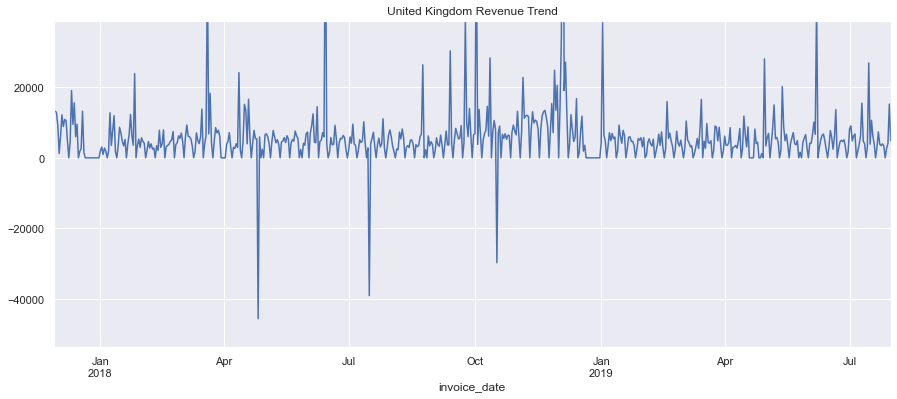

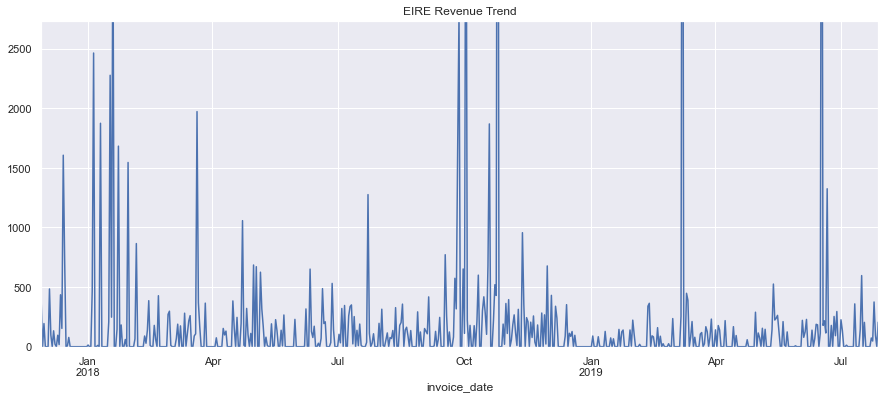

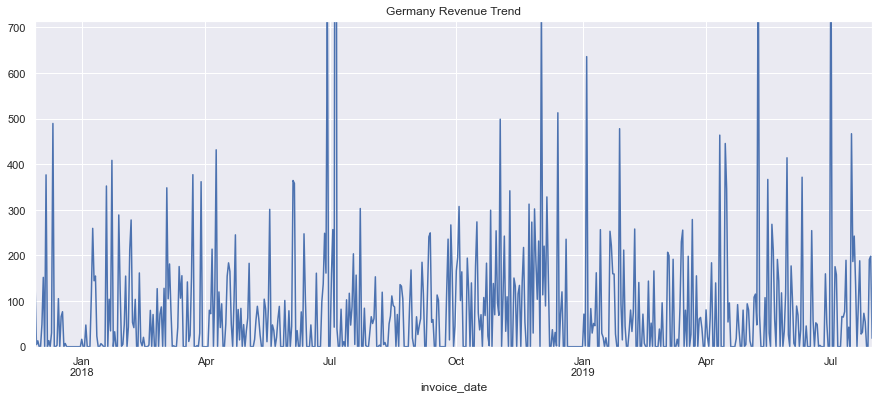

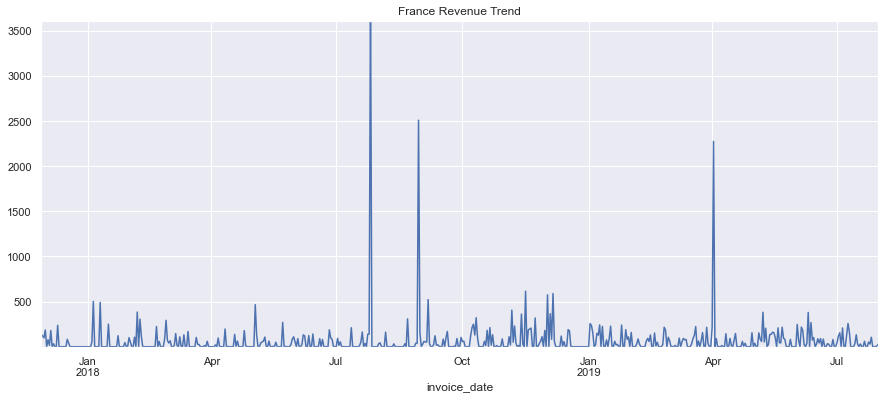

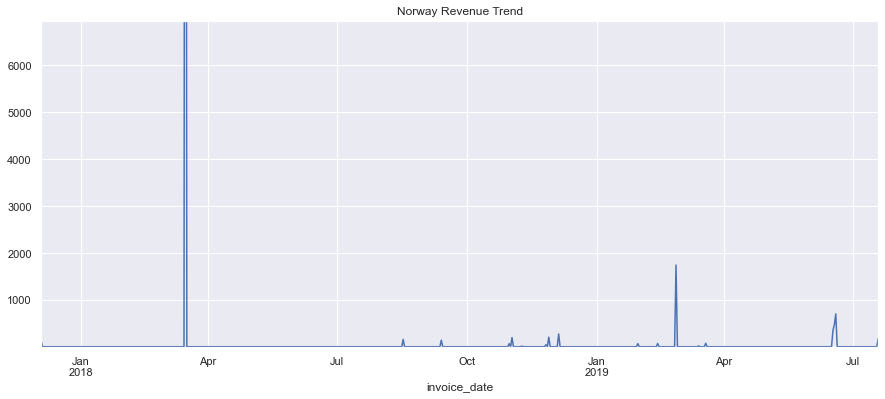

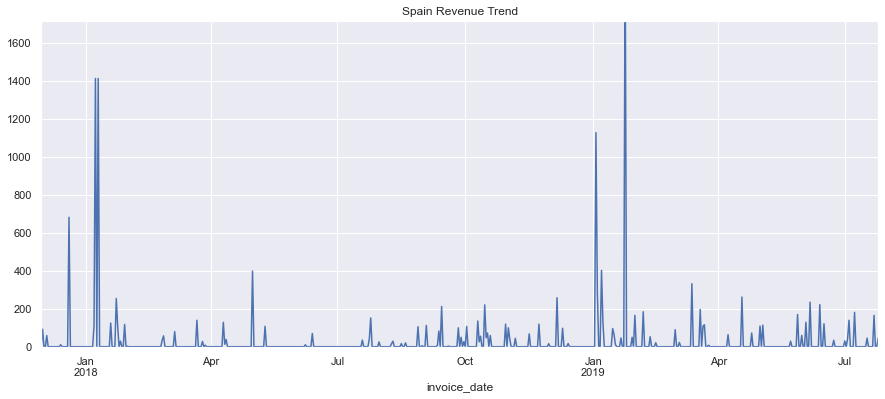

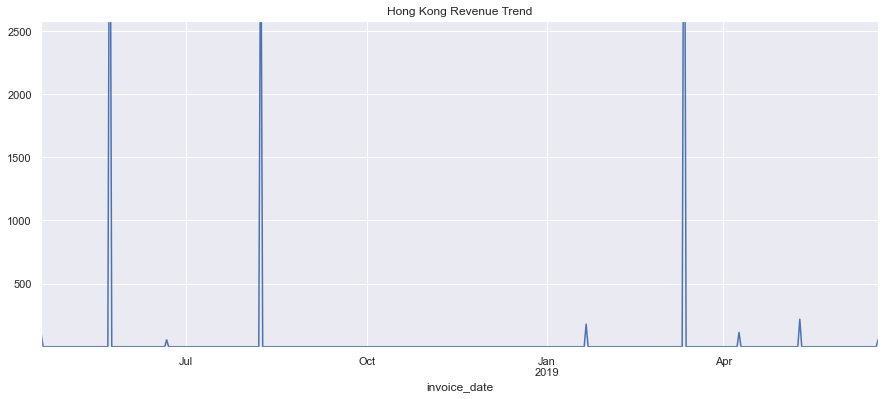

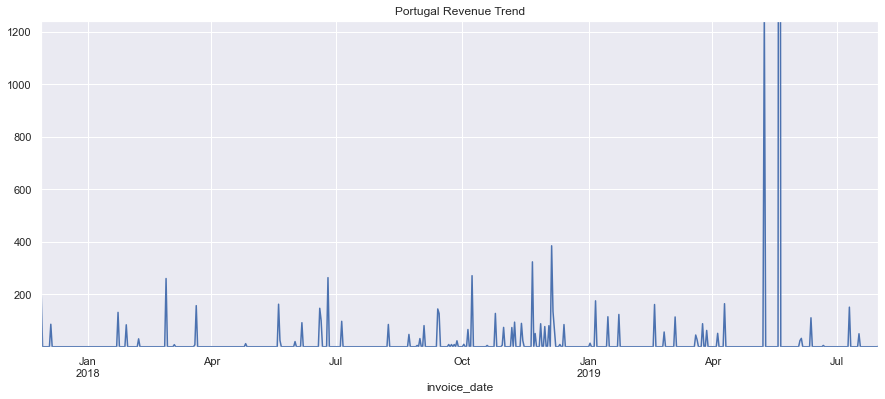

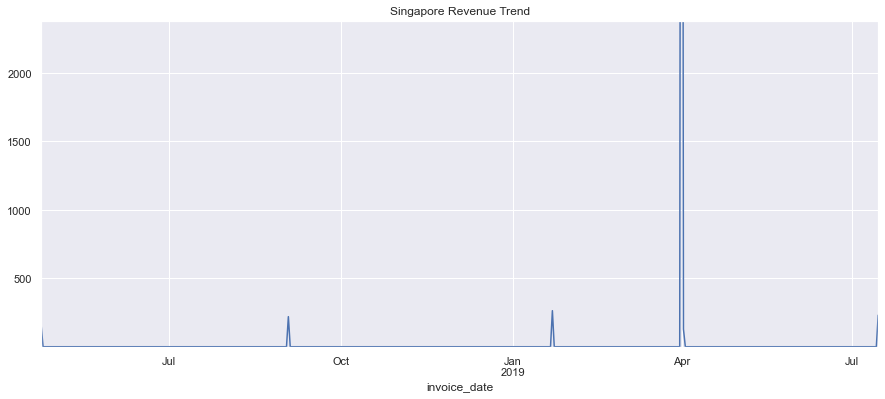

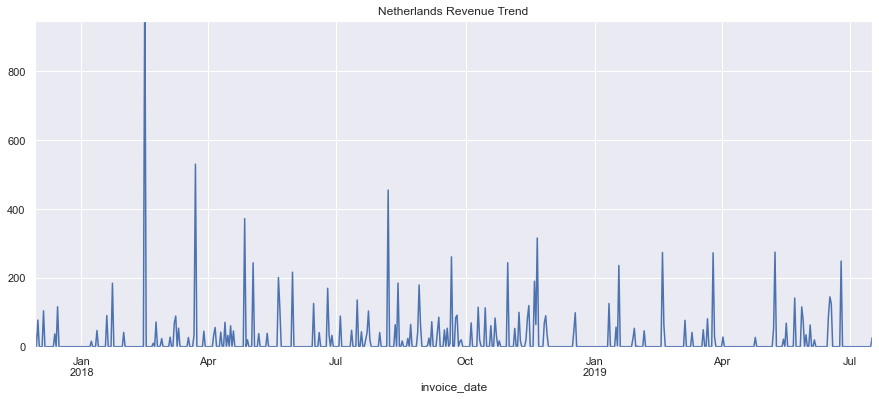

In [26]:

rcParams['figure.figsize'] = 18, 8
sns.set(rc={'figure.figsize':(11, 4)})

for top_country in top_ten_countries:
    dataset_Country = dataset[dataset['country']==top_country]
    dataset_Country = dataset_Country.set_index('invoice_date')
    y = dataset_Country.groupby('invoice_date')['price'].sum().reset_index()
    y_Max = dataset_Country.groupby('invoice_date')['price'].max()
    y_Min = dataset_Country.groupby('invoice_date')['price'].min()
    y = dataset_Country['price'].resample('D').sum()
    y.plot(figsize = (15, 6))
    plt.title(top_country+" Revenue Trend")
    plt.ylim(y_Min[:y.shape[0]].min(),y_Max[:y.shape[0]].max())
    plt.show()
    

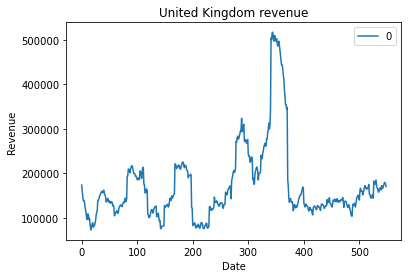

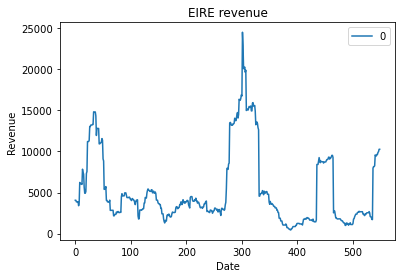

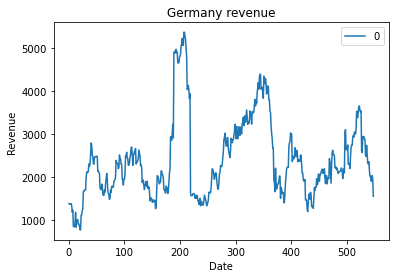

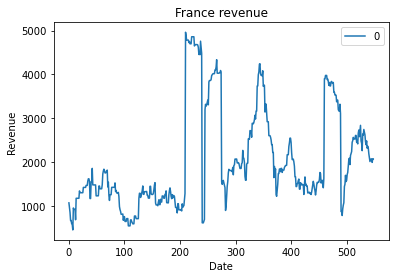

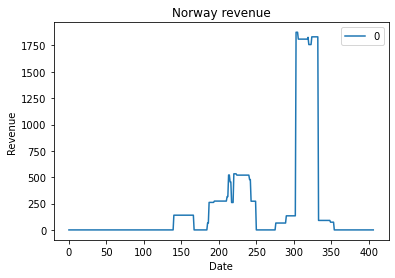

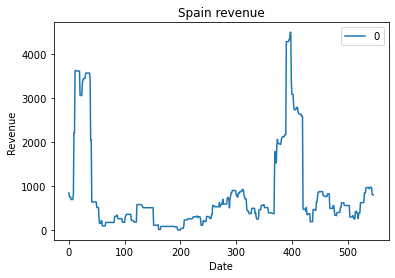

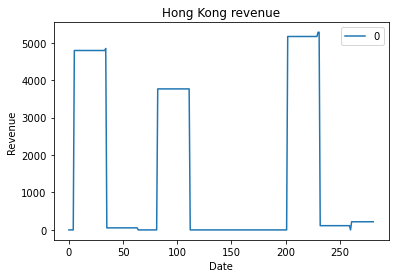

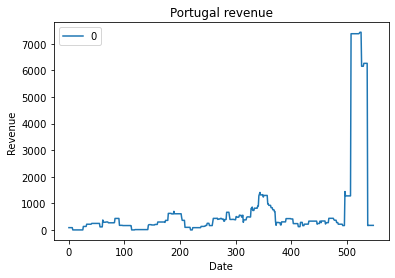

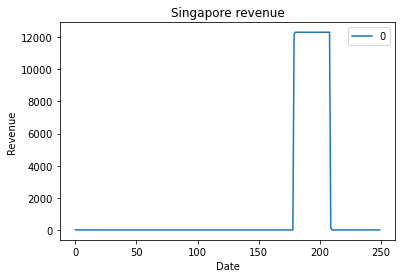

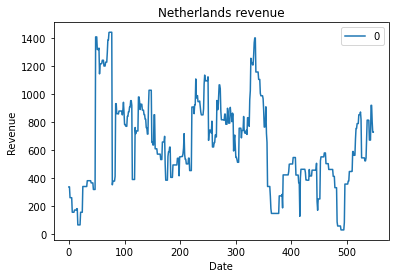

In [54]:
#Visualize the forecasting
for top_country in top_ten_countries:
    county_Data = dataset[dataset['country']==top_country]
    country_TS = convert_to_ts(county_Data)
    X,y,dates = engineer_features(country_TS)
    y = pd.DataFrame(y)
    ax = y.plot(title=top_country+" revenue",label = 'observed')
    ax.set_xlabel("Date")
    ax.set_ylabel('Revenue')
    plt.legend()
    plt.show()

#Visualizations on Price Trends for Top Ten countries

In [7]:
#RandomForestRegression
!python model.py

TRAINING MODELS
... loading ts data from files
... saving model: models\sl-all-0_1.joblib
... saving model: models\sl-eire-0_1.joblib
... saving model: models\sl-france-0_1.joblib
... saving model: models\sl-germany-0_1.joblib
... saving model: models\sl-hong_kong-0_1.joblib
... saving model: models\sl-netherlands-0_1.joblib
... saving model: models\sl-norway-0_1.joblib
... saving model: models\sl-portugal-0_1.joblib
... saving model: models\sl-singapore-0_1.joblib
... saving model: models\sl-spain-0_1.joblib
... saving model: models\sl-united_kingdom-0_1.joblib
LOADING MODELS
... loading ts data from files
... models loaded:  all,eire,france,germany,hong_kong,netherlands,norway,portugal,singapore,spain,united_kingdom
... loading ts data from files
2018-01-05
{'y_pred': array([183213.762]), 'y_proba': None}


In [21]:
!python ./unittests/LoggerTests.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.030s

OK


In [22]:
!python ./unittests/ApiTests.py

ssss
----------------------------------------------------------------------
Ran 4 tests in 0.000s

OK (skipped=4)


In [205]:
!python run-tests.py

... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... saving test version of model: C:\Users\AshwiniShitole\Desktop\Ashwini\Personal\Data Science\AI Academy\AI Enterprise Workflow Certification\AI in Production\Capstone_Project\case-study-soln\models\test-all-0_1.joblib
... saving test version of model: C:\Users\AshwiniShitole\Desktop\Ashwini\Personal\Data Science\AI Academy\AI Enterprise Workflow Certification\AI in Production\Capstone_Project\case-study-soln\models\test-united_kingdom-0_1.joblib

ssss.......
----------------------------------------------------------------------
Ran 11 tests in 67.235s

OK (skipped=4)



... loading ts data from files
... loading ts data from files
2018-01-05


In [44]:
!python monitoring.py

outlier_X 2.4
wasserstein_X 0.09
wasserstein_y 12432.55
done
